In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

Pull in respective libraries to prepare the notebook environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
from ultralytics import YOLO
from utils.downloads import attempt_download

display = utils.notebook_init()  # checks

!pip install roboflow
from roboflow import Roboflow

YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 301.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 651.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# Infer on ImageNet

Download the ImageNet trained models pretrained on ImageNet using YOLO11 Utils.

In [ ]:
p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolo11{x}.pt')

# Classifier for nazi symbol detection

### Prepare dataset

In [ ]:
dataset_name = "nazi-symbols-detection"
dataset_path = f"/content/datasets/{dataset_name}"
rf = Roboflow(api_key="")
project = rf.workspace("zhiwei").project(dataset_name)
version = project.version(1)
dataset = version.download("folder", dataset_path)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/nazi-symbols-detection in folder:: 100%|██████████| 7510/7510 [00:04<00:00, 1748.27it/s]


In [ ]:
import shutil

shutil.move(f"{dataset_path}/valid", f"{dataset_path}/val")

'/content/datasets/nazi-symbols-detection/val'

### Training
Train a model to determine whether a given image contains nazi symbols or not.

In [ ]:
# Load a model
model = YOLO("yolo11s-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=dataset_path, epochs=30, imgsz=640)

100%|██████████| 13.0M/13.0M [00:00<00:00, 97.1MB/s]


Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11s-cls.pt, data=/content/datasets/nazi-symbol-detection, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 5.35M/5.35M [00:00<00:00, 190MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/nazi-symbol-detection/train... 6561 images, 0 corrupt: 100%|██████████| 6561/6561 [00:01<00:00, 3822.60it/s]


train: New cache created: /content/datasets/nazi-symbol-detection/train.cache


val: Scanning /content/datasets/nazi-symbol-detection/val... 625 images, 0 corrupt: 100%|██████████| 625/625 [00:00<00:00, 1396.10it/s]

val: New cache created: /content/datasets/nazi-symbol-detection/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.92it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.74it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.68it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.90it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.95it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30      3.29G     0.2194          1        640: 100%|██████████| 411/411 [04:24<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30       3.3G     0.1794          1        640: 100%|██████████| 411/411 [04:29<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30      3.29G     0.1897          1        640: 100%|██████████| 411/411 [04:28<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.48it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30       3.3G     0.1713          1        640: 100%|██████████| 411/411 [04:35<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30      3.29G     0.1566          1        640: 100%|██████████| 411/411 [04:25<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30       3.3G     0.1324          1        640: 100%|██████████| 411/411 [04:24<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.74it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30      3.29G     0.1131          1        640: 100%|██████████| 411/411 [04:32<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30       3.3G     0.1192          1        640: 100%|██████████| 411/411 [04:33<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30      3.29G     0.1078          1        640: 100%|██████████| 411/411 [04:31<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.98it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30       3.3G    0.09181          1        640: 100%|██████████| 411/411 [04:29<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30      3.29G    0.08002          1        640: 100%|██████████| 411/411 [04:24<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30       3.3G     0.0781          1        640: 100%|██████████| 411/411 [04:18<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30      3.29G     0.0699          1        640: 100%|██████████| 411/411 [04:17<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:09<00:00,  2.00it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30       3.3G    0.07916          1        640: 100%|██████████| 411/411 [04:22<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:10<00:00,  1.87it/s]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30      3.29G    0.06162          1        640: 100%|██████████| 411/411 [04:21<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30       3.3G    0.05049          1        640: 100%|██████████| 411/411 [04:18<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30      3.29G    0.04499          1        640: 100%|██████████| 411/411 [04:17<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30       3.3G    0.04388          1        640: 100%|██████████| 411/411 [04:17<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.82it/s]

                   all      0.912          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30      3.29G    0.03645          1        640: 100%|██████████| 411/411 [04:13<00:00,  1.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30       3.3G    0.03388          1        640: 100%|██████████| 411/411 [04:12<00:00,  1.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]

                   all      0.918          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30      3.29G    0.03142          1        640: 100%|██████████| 411/411 [04:12<00:00,  1.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:11<00:00,  1.71it/s]

                   all      0.917          1



30 epochs completed in 2.322 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 11.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 11.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
train: /content/datasets/nazi-symbol-detection/train... found 6561 images in 2 classes ✅ 
val: /content/datasets/nazi-symbol-detection/val... found 625 images in 2 classes ✅ 
test: /content/datasets/nazi-symbol-detection/test... found 313 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:12<00:00,  1.67it/s]


                   all      0.918          1
Speed: 0.7ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


### Validation

In [ ]:
model = YOLO("runs/classify/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
train: /content/datasets/nazi-symbol-detection/train... found 6561 images in 2 classes ✅ 
val: /content/datasets/nazi-symbol-detection/val... found 625 images in 2 classes ✅ 
test: /content/datasets/nazi-symbol-detection/test... found 313 images in 2 classes ✅ 


val: Scanning /content/datasets/nazi-symbol-detection/val... 625 images, 0 corrupt: 100%|██████████| 625/625 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]


                   all      0.918          1
Speed: 0.6ms preprocess, 5.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


In [ ]:
!cp -r /content/yolov5/runs/classify/train /content/drive/MyDrive/yolov5su-cls-nazi-symbol-detection

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

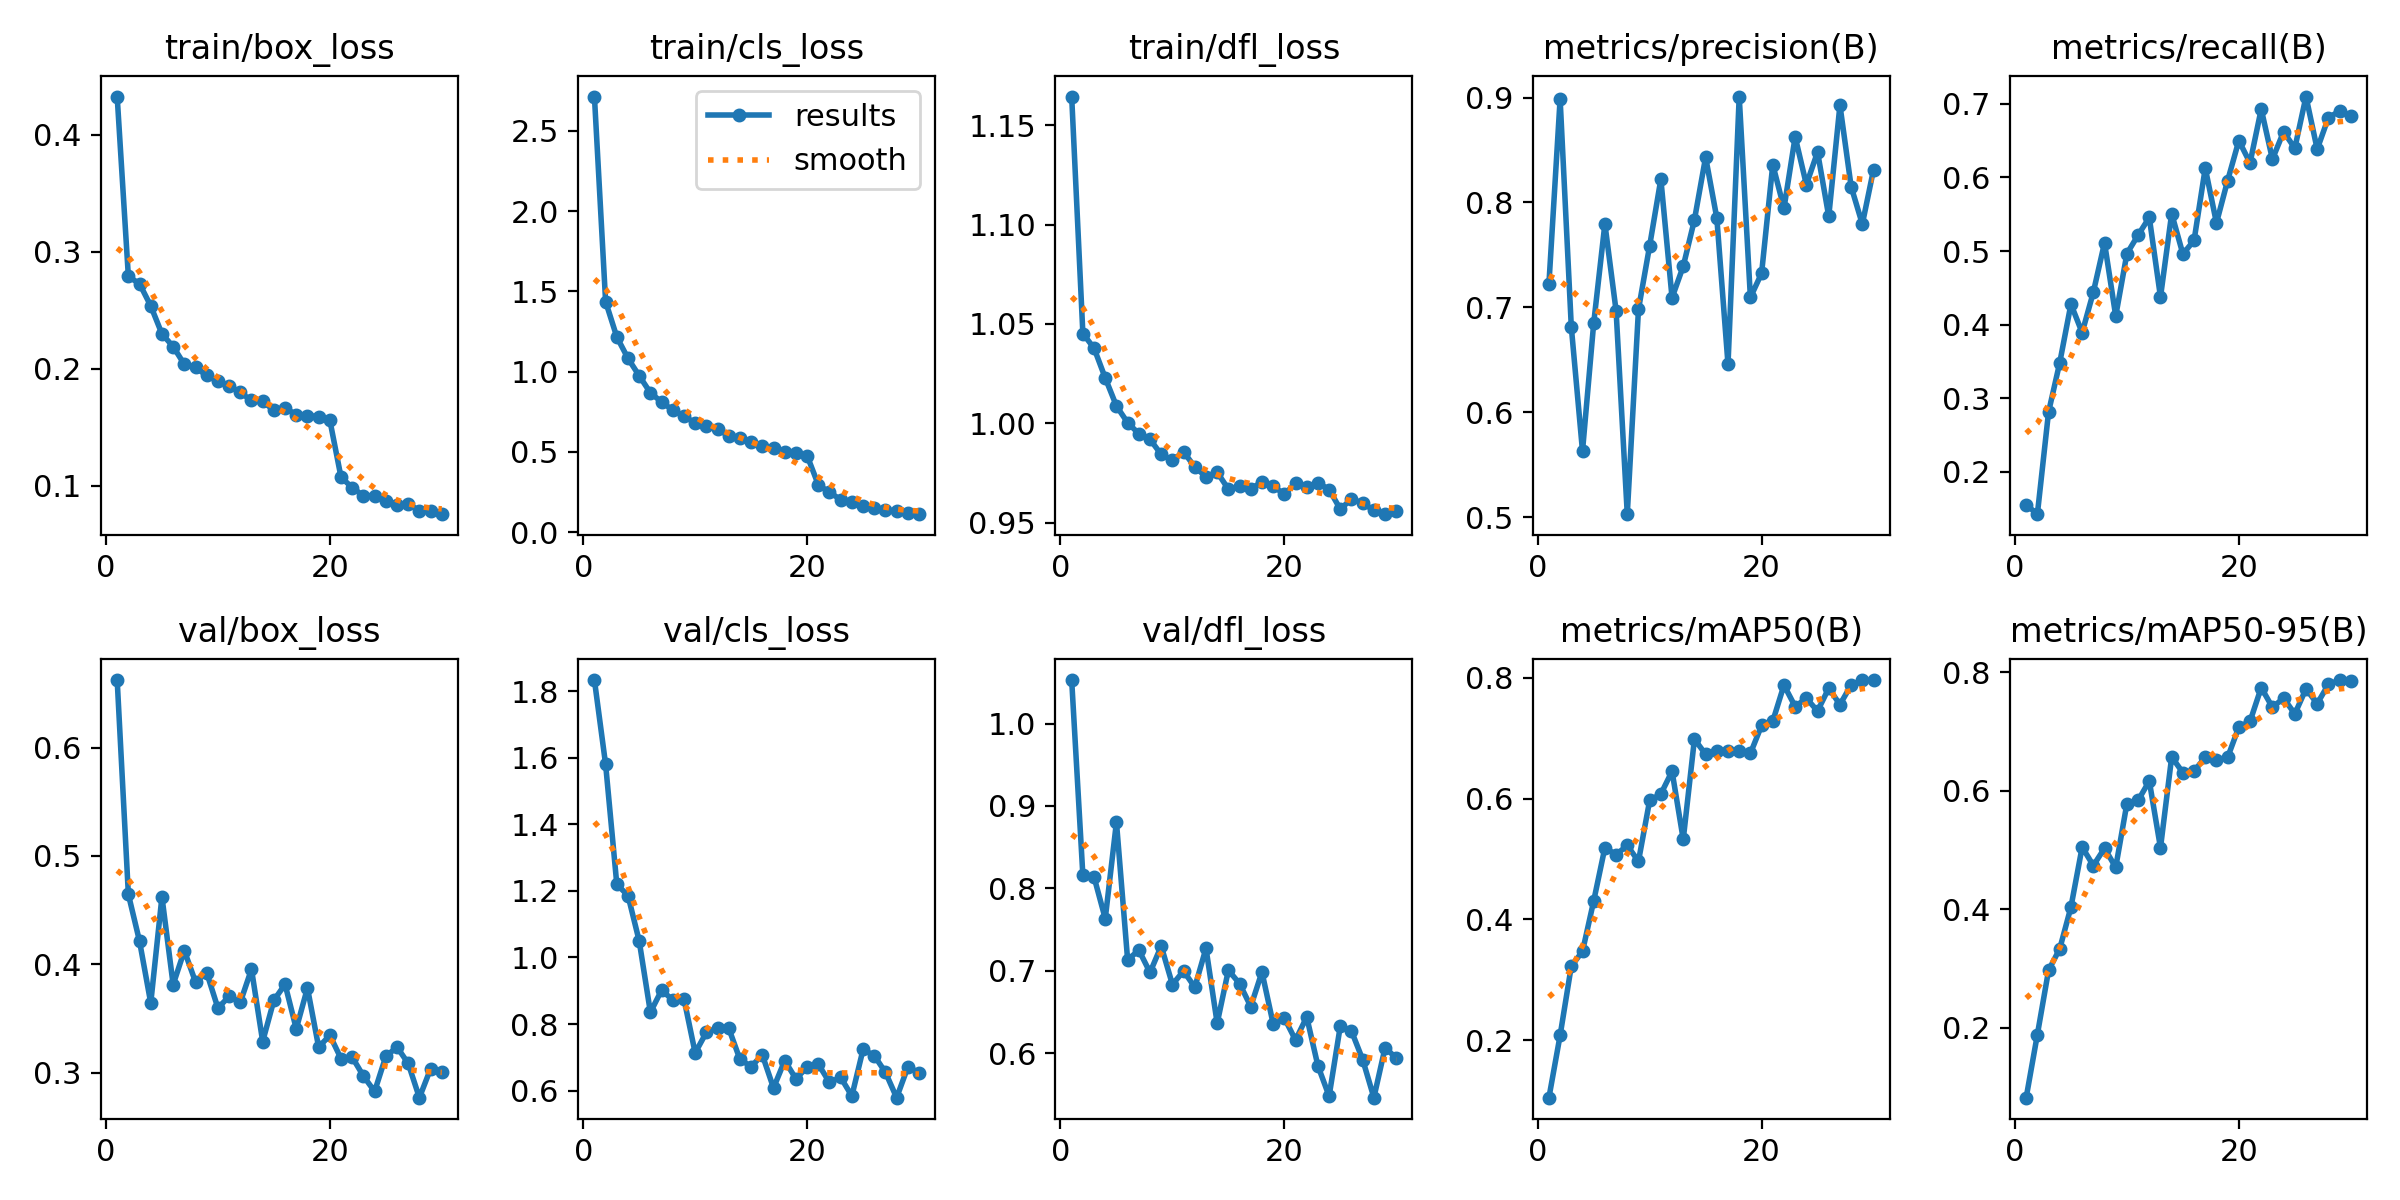

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
from IPython.display import Image

Image(filename='/content/drive/MyDrive/yolov5su-cls-multiple-nazi-symbols/results.png', width=1000)  # view results.png